In [1]:
import eikon as ek  # the Eikon Python wrapper package
import numpy as np  # NumPy
import pandas as pd  # pandas
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

In [3]:
cfg = cp.ConfigParser()
cfg.read('../refinitiv.cfg')
ek.set_app_key(cfg['eikon']['app_id'])

In [4]:
dji = ek.get_data('0#.DJI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])[0]

In [5]:
dji

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,GS.N,Goldman Sachs Group Inc,325.52,477987,-4.035551
1,NKE.N,Nike Inc,97.67,1718036,-15.526591
2,CSCO.OQ,Cisco Systems Inc,56.67,5276417,21.980137
3,JPM.N,JPMorgan Chase & Co,143.83,1822523,9.563929
4,DIS.N,Walt Disney Co,81.58,3044912,-7.262891
5,INTC.OQ,Intel Corp,38.01,12470347,47.402717
6,DOW.N,Dow Inc,53.71,1186185,11.627381
7,MRK.N,Merck & Co Inc,109.05,2107368,-1.390959
8,CVX.N,Chevron Corp,167.21,1968644,-4.517224
9,AXP.N,American Express Co,157.43,473635,7.260319


In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy.random import random, uniform, dirichlet, choice
from numpy.linalg import inv

from scipy.optimize import minimize

import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import math

In [8]:
sns.set_style('whitegrid')
np.random.seed(42)
cmap = sns.diverging_palette(10, 240, n=9, as_cmap=True)

In [ ]:
#!pip3 install pandas_datareader.data

In [9]:
from datetime import datetime, timedelta
end = datetime.today()
start = end - timedelta(days=(365.2*10))
print(start, end)

2013-09-08 16:27:34.850823 2023-09-08 16:27:34.850823


In [10]:
const = dji['Instrument'].tolist()
const_limp = [i for i in const if i != '']
const

['GS.N',
 'NKE.N',
 'CSCO.OQ',
 'JPM.N',
 'DIS.N',
 'INTC.OQ',
 'DOW.N',
 'MRK.N',
 'CVX.N',
 'AXP.N',
 'VZ.N',
 'HD.N',
 'WBA.OQ',
 'MCD.N',
 'UNH.N',
 'KO.N',
 'JNJ.N',
 'MSFT.OQ',
 'HON.OQ',
 'CRM.N',
 'PG.N',
 'IBM.N',
 'MMM.N',
 'AAPL.OQ',
 'WMT.N',
 'CAT.N',
 'AMGN.OQ',
 'V.N',
 'TRV.N',
 'BA.N']

In [12]:
df = ek.get_timeseries(const_limp, start_date = start, end_date = end, fields='CLOSE', interval="weekly")
df.count()

CLOSE
GS.N       100
NKE.N      100
CSCO.OQ    100
JPM.N      100
DIS.N      100
INTC.OQ    100
DOW.N      100
MRK.N      100
CVX.N      100
AXP.N      100
VZ.N       100
HD.N       100
WBA.OQ     100
MCD.N      100
UNH.N      100
KO.N       100
JNJ.N      100
MSFT.OQ    100
HON.OQ     100
CRM.N      100
PG.N       100
IBM.N      100
MMM.N      100
AAPL.OQ    100
WMT.N      100
CAT.N      100
AMGN.OQ    100
V.N        100
TRV.N      100
BA.N       100
dtype: int64

In [17]:
const[0]

'CSCO.OQ'

In [24]:
df = ek.get_timeseries(const_limp[0], start_date = start, end_date = end, fields='CLOSE', interval="weekly")
df[const_limp[0]] = np.log(df['CLOSE'].div(df['CLOSE'].shift(1)))
weekly_returns = df.drop(['CLOSE'], axis=1)
weekly_returns 

GS.N,GS.N
Date,
2013-09-13,<NA>
2013-09-20,0.03446
2013-09-27,-0.060091
2013-10-04,-0.02086
2013-10-11,0.021798
...,...
2023-08-11,-0.036001
2023-08-18,-0.047481
2023-08-25,-0.01482


In [26]:
semanas = round(weekly_returns.count()[0])
semanas

521

In [29]:
for i in const_limp[1:]:
    w = ek.get_timeseries(i, start_date = start, end_date = end, fields='CLOSE', interval="weekly")
    w[i] = np.log(w['CLOSE'].div(w['CLOSE'].shift(1)))
    w1 = w.drop(['CLOSE'], axis=1)
    p = round(w1.count()[0])
    print(i, p)
    if p == semanas:    
        weekly_returns = weekly_returns.join(w1, lsuffix="_left", rsuffix="_right")

NKE.N 521
CSCO.OQ 521
JPM.N 521
DIS.N 521
INTC.OQ 521
DOW.N 233
MRK.N 521
CVX.N 521
AXP.N 521
VZ.N 521
HD.N 521
WBA.OQ 521
MCD.N 521
UNH.N 521
KO.N 521
JNJ.N 521
MSFT.OQ 521
HON.OQ 521
CRM.N 521
PG.N 521
IBM.N 521
MMM.N 521
AAPL.OQ 521
WMT.N 521
CAT.N 521
AMGN.OQ 521
V.N 521
TRV.N 521
BA.N 521


In [33]:
weekly_returns = weekly_returns.dropna()
weekly_returns

,GS.N,NKE.N,CSCO.OQ,JPM.N,DIS.N,INTC.OQ,MRK.N,CVX.N,AXP.N,VZ.N,...,PG.N,IBM.N,MMM.N,AAPL.OQ,WMT.N,CAT.N,AMGN.OQ,V.N,TRV.N,BA.N
Date,,,,,,,,,,,,,,,,,,,,,
2013-09-20,0.03446,0.021271,0.007374,0.003985,-0.025514,0.014821,0.004593,0.006264,0.026473,0.000419,...,0.004292,-0.011251,0.011819,0.004464,0.019576,-0.026317,0.015266,0.050703,0.02948,0.046508
2013-09-27,-0.060091,0.059734,-0.048076,-0.010663,0.002765,-0.034641,-0.004593,-0.01842,-0.018668,-0.01646,...,-0.027843,-0.016449,0.001748,0.033212,-0.019576,-0.011273,-0.031652,-0.029501,-0.007582,0.01793
2013-10-04,-0.02086,-0.02058,-0.014234,0.008198,0.001686,-0.007425,0.009165,-0.037468,-0.021039,0.002125,...,-0.015533,-0.015202,-0.006844,0.00058,-0.021202,0.004762,-0.002477,-0.013402,-0.008584,-0.013054
2013-10-11,0.021798,0.018132,0.011231,-0.003042,0.013839,0.019536,-0.019682,-0.003902,0.014562,-0.000212,...,0.031847,0.011127,0.010995,0.02043,0.027369,0.016607,-0.017692,0.008989,-0.000236,0.006633
2013-10-18,-0.008221,0.033071,-0.01297,0.033521,0.014097,0.025887,-0.014484,0.016687,0.065698,0.060162,...,0.01178,-0.068816,0.017409,0.031841,0.011825,0.020006,0.035076,0.042028,0.022426,0.037759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-11,-0.036001,-0.006639,0.021801,-0.010114,0.031031,-0.00714,0.022972,0.029929,-0.000847,0.022432,...,0.011143,-0.007795,-0.00914,-0.023349,0.017901,0.031267,0.076076,0.004384,-0.01067,0.01867
2023-08-18,-0.047481,-0.030815,0.022973,-0.036125,-0.034979,-0.063297,0.016249,-0.019998,-0.03097,-0.00541,...,-0.028946,-0.01202,-0.044395,-0.018736,-0.020494,-0.040863,-0.002632,-0.007821,-0.026662,-0.039238
2023-08-25,-0.01482,-0.058647,0.01192,-0.012972,-0.030713,0.015152,0.009207,-0.011124,-0.011992,0.00511,...,0.006534,0.027481,-0.010656,0.023337,-0.000697,-0.004539,-0.020997,0.018306,-0.005122,-0.014398


In [34]:
weekly_returns.shape

(521, 29)

# Set Parameters

In [35]:
stocks = weekly_returns.columns

In [36]:
n_obs, n_assets = weekly_returns.shape
n_assets, n_obs

(29, 521)

In [37]:
NUM_PF = 100000 # no of portfolios to simulate

In [39]:
x0 = uniform(0, 1, n_assets)
x0 /= np.sum(np.abs(x0))
x0

array([0.00318852, 0.04170401, 0.01170537, 0.00446537, 0.06513483,
       0.06628437, 0.05549123, 0.02090976, 0.00670456, 0.04696815,
       0.03021361, 0.00837713, 0.03399068, 0.00236055, 0.06241894,
       0.01776356, 0.04547785, 0.02139694, 0.03569929, 0.03752811,
       0.01268906, 0.06655569, 0.05320783, 0.0644905 , 0.06142409,
       0.04104195, 0.06328068, 0.00607444, 0.01345295])

# Annualization Factor

In [41]:
periods_per_year = round(weekly_returns.resample('A').size().mean())
periods_per_year

47

# Compute Mean Returns, Covariance and Precision Matrix

In [43]:
mean_returns = weekly_returns.mean()
cov_matrix = weekly_returns.cov()
cov_matrix

,GS.N,NKE.N,CSCO.OQ,JPM.N,DIS.N,INTC.OQ,MRK.N,CVX.N,AXP.N,VZ.N,...,PG.N,IBM.N,MMM.N,AAPL.OQ,WMT.N,CAT.N,AMGN.OQ,V.N,TRV.N,BA.N
GS.N,0.001590,0.000751,0.000619,0.001229,0.000843,0.000744,0.000301,0.000872,0.001189,0.000300,...,0.000316,0.000675,0.000727,0.000624,0.000285,0.000929,0.000482,0.000686,0.000760,0.001490
NKE.N,0.000751,0.001404,0.000498,0.000654,0.000681,0.000613,0.000166,0.000479,0.000755,0.000268,...,0.000371,0.000436,0.000509,0.000605,0.000276,0.000590,0.000369,0.000583,0.000510,0.001184
CSCO.OQ,0.000619,0.000498,0.001065,0.000567,0.000503,0.000647,0.000274,0.000505,0.000615,0.000286,...,0.000326,0.000540,0.000491,0.000531,0.000374,0.000582,0.000425,0.000507,0.000427,0.000720
JPM.N,0.001229,0.000654,0.000567,0.001308,0.000758,0.000655,0.000294,0.000788,0.001163,0.000298,...,0.000285,0.000607,0.000676,0.000515,0.000235,0.000881,0.000398,0.000636,0.000723,0.001333
DIS.N,0.000843,0.000681,0.000503,0.000758,0.001222,0.000602,0.000219,0.000637,0.000886,0.000251,...,0.000320,0.000469,0.000505,0.000585,0.000280,0.000639,0.000392,0.000631,0.000569,0.001221
INTC.OQ,0.000744,0.000613,0.000647,0.000655,0.000602,0.001698,0.000212,0.000598,0.000676,0.000340,...,0.000387,0.000622,0.000718,0.000705,0.000315,0.000702,0.000510,0.000538,0.000417,0.001046
MRK.N,0.000301,0.000166,0.000274,0.000294,0.000219,0.000212,0.000803,0.000350,0.000262,0.000254,...,0.000230,0.000268,0.000243,0.000263,0.000223,0.000298,0.000519,0.000254,0.000340,0.000307
CVX.N,0.000872,0.000479,0.000505,0.000788,0.000637,0.000598,0.000350,0.001561,0.000905,0.000366,...,0.000286,0.000570,0.000567,0.000416,0.000209,0.000898,0.000436,0.000505,0.000665,0.001307
AXP.N,0.001189,0.000755,0.000615,0.001163,0.000886,0.000676,0.000262,0.000905,0.001809,0.000306,...,0.000340,0.000656,0.000712,0.000670,0.000245,0.000858,0.000441,0.000921,0.000792,0.001742
VZ.N,0.000300,0.000268,0.000286,0.000298,0.000251,0.000340,0.000254,0.000366,0.000306,0.000658,...,0.000255,0.000307,0.000307,0.000192,0.000213,0.000333,0.000310,0.000217,0.000323,0.000395


In [44]:
precision_matrix = pd.DataFrame(inv(cov_matrix), index=stocks, columns=stocks)
precision_matrix

,GS.N,NKE.N,CSCO.OQ,JPM.N,DIS.N,INTC.OQ,MRK.N,CVX.N,AXP.N,VZ.N,...,PG.N,IBM.N,MMM.N,AAPL.OQ,WMT.N,CAT.N,AMGN.OQ,V.N,TRV.N,BA.N
GS.N,2739.537484,-113.650887,30.768583,-1857.760885,-196.068335,-25.895894,123.365364,-140.518647,-59.900787,137.467737,...,107.949363,-171.054909,-76.890367,-96.069089,-75.524933,-12.890371,-100.690231,80.783064,-241.224437,-87.433081
NKE.N,-113.650887,1349.575716,-63.354748,-66.744218,-182.378862,-37.464311,176.385384,154.570617,98.731696,-127.480186,...,-208.686455,140.485257,79.522886,-54.490529,28.463232,-107.913034,-8.424436,-103.531765,-57.383414,-122.626417
CSCO.OQ,30.768583,-63.354748,1834.480767,-131.628158,-23.784550,-158.435416,-10.029594,-39.370648,7.629204,-64.066426,...,-10.706820,-345.000482,7.428562,-37.484839,-319.772224,-99.874758,3.039772,-228.790627,-14.778084,72.674104
JPM.N,-1857.760885,-66.744218,-131.628158,3854.523592,-174.180846,-63.635748,-302.858821,16.783548,-943.776226,-48.106070,...,25.180313,-84.369565,-244.243832,95.761869,161.216045,-287.965965,234.120022,72.939565,-419.600499,73.419200
DIS.N,-196.068335,-182.378862,-23.784550,-174.180846,1787.965674,-48.262106,100.268641,-80.704475,-38.441224,-21.181836,...,-86.350683,96.506302,174.059387,-87.638315,-122.427406,-17.846914,-61.306941,-284.190253,-72.362363,-121.581841
INTC.OQ,-25.895894,-37.464311,-158.435416,-63.635748,-48.262106,1122.174289,96.289383,-73.488802,102.953827,-130.565306,...,-139.901921,-170.941361,-410.600552,-163.087429,-10.923560,4.758590,-118.634209,-15.183556,217.045002,-85.737332
MRK.N,123.365364,176.385384,-10.029594,-302.858821,100.268641,96.289383,2288.260405,-38.523009,207.167196,-167.205982,...,-34.623245,-4.491710,292.424964,-127.403549,-102.183739,-25.347135,-727.913790,68.357764,-377.642250,68.986663
CVX.N,-140.518647,154.570617,-39.370648,16.783548,-80.704475,-73.488802,-38.523009,1355.803960,-85.811943,-179.040998,...,117.638221,20.023020,172.301842,40.896942,164.751844,-372.008776,64.538132,81.952877,-128.972402,-108.834563
AXP.N,-59.900787,98.731696,7.629204,-943.776226,-38.441224,102.953827,207.167196,-85.811943,2163.776846,-61.656480,...,207.738755,81.893515,-9.940462,-53.945630,33.408807,-3.636285,113.852131,-1082.567608,-2.122889,-239.618427
VZ.N,137.467737,-127.480186,-64.066426,-48.106070,-21.181836,-130.565306,-167.205982,-179.040998,-61.656480,2321.102223,...,-328.405064,-162.281804,-133.655195,120.431841,-108.561232,-41.815799,-176.873266,148.898899,-266.569376,79.436214


# Risk-Free Rate
Load historical 10-year Treasury rate:

In [46]:
treasury_10yr_monthly = (web.DataReader('DGS10', 'fred', start, end)
                         .resample('M')
                         .last()
                         .div(periods_per_year)
                         .div(100)
                         .squeeze())

In [47]:
treasury_10yr_monthly

DATE
2013-09-30    0.000562
2013-10-31    0.000547
2013-11-30    0.000585
2013-12-31    0.000647
2014-01-31    0.000568
                ...   
2023-05-31    0.000774
2023-06-30    0.000811
2023-07-31    0.000845
2023-08-31    0.000870
2023-09-30    0.000909
Freq: M, Name: DGS10, Length: 121, dtype: float64

In [48]:
rf_rate = 0.000751

# Simulate Random Portfolios
The simulation generates random weights using the Dirichlet distribution, and computes the mean, standard deviation, and SR for each sample portfolio using the historical return data:

In [49]:
def simulate_portfolios(mean_ret, cov, rf_rate=rf_rate, short=True):
    alpha = np.full(shape=n_assets, fill_value=.05)
    weights = dirichlet(alpha=alpha, size=NUM_PF)
    if short:
        weights *= choice([-1, 1], size=weights.shape)

    returns = weights @ mean_ret.values + 1
    returns = returns ** periods_per_year - 1
    std = (weights @ weekly_returns.T).std(1)
    std *= np.sqrt(periods_per_year)
    sharpe = (returns - rf_rate) / std
    return pd.DataFrame({'Annualized Standard Deviation': std,
                         'Annualized Returns': returns,
                         'Sharpe Ratio': sharpe}), weights

In [50]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)

In [51]:
df = pd.DataFrame(simul_wt)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,3.398150e-02,3.464278e-02,3.450933e-02,3.453220e-02,3.495758e-02,3.510540e-02,3.428596e-02,3.415599e-02,3.424777e-02,3.378090e-02,...,3.514589e-02,3.428804e-02,3.446720e-02,3.508122e-02,3.434062e-02,3.444234e-02,3.485724e-02,3.489926e-02,3.439853e-02,3.471551e-02
std,1.158882e-01,1.167949e-01,1.166166e-01,1.166566e-01,1.176704e-01,1.178027e-01,1.159641e-01,1.155803e-01,1.156700e-01,1.153951e-01,...,1.179781e-01,1.161927e-01,1.167501e-01,1.176231e-01,1.168468e-01,1.164479e-01,1.169159e-01,1.177356e-01,1.163281e-01,1.174293e-01
min,2.763858e-102,3.971899e-124,1.197983e-125,1.472905e-113,8.388562e-118,1.847912e-102,7.584851e-107,4.930696e-94,1.114470e-93,6.664851e-109,...,2.771185e-96,5.356331e-105,5.878635e-101,6.050848e-101,4.688761e-110,3.370666e-114,8.977195e-122,3.685382e-122,1.023276e-126,4.707722e-121
25%,5.767319e-13,4.643900e-13,6.712430e-13,6.228737e-13,5.891184e-13,5.470865e-13,6.177352e-13,5.324130e-13,4.799539e-13,4.599956e-13,...,4.930148e-13,6.350584e-13,5.560706e-13,5.369080e-13,5.208906e-13,5.324600e-13,4.071197e-13,5.580024e-13,4.697768e-13,5.305484e-13
50%,5.339939e-07,5.923360e-07,6.463025e-07,5.865952e-07,6.276679e-07,6.417477e-07,5.433801e-07,5.839828e-07,5.671855e-07,4.660496e-07,...,5.326462e-07,5.737570e-07,6.115529e-07,5.425535e-07,5.955046e-07,5.968678e-07,5.810316e-07,5.871027e-07,5.820080e-07,6.213388e-07
75%,1.713396e-03,1.937734e-03,2.006352e-03,1.883610e-03,2.019770e-03,2.007506e-03,1.899044e-03,1.909034e-03,1.929488e-03,1.768759e-03,...,1.881513e-03,1.946775e-03,2.004844e-03,1.912941e-03,1.873042e-03,1.958477e-03,1.927199e-03,1.893115e-03,1.932252e-03,2.040892e-03
max,9.997293e-01,9.971350e-01,9.996564e-01,9.952200e-01,9.987384e-01,9.928726e-01,9.974537e-01,9.929447e-01,9.947331e-01,9.998197e-01,...,9.974839e-01,9.989790e-01,9.979432e-01,9.996750e-01,9.976451e-01,9.992168e-01,9.947033e-01,9.991196e-01,9.968796e-01,9.975416e-01


In [52]:
# Plot Simulated Portfolios

Max Sharpe: 20.72%, 23.09%


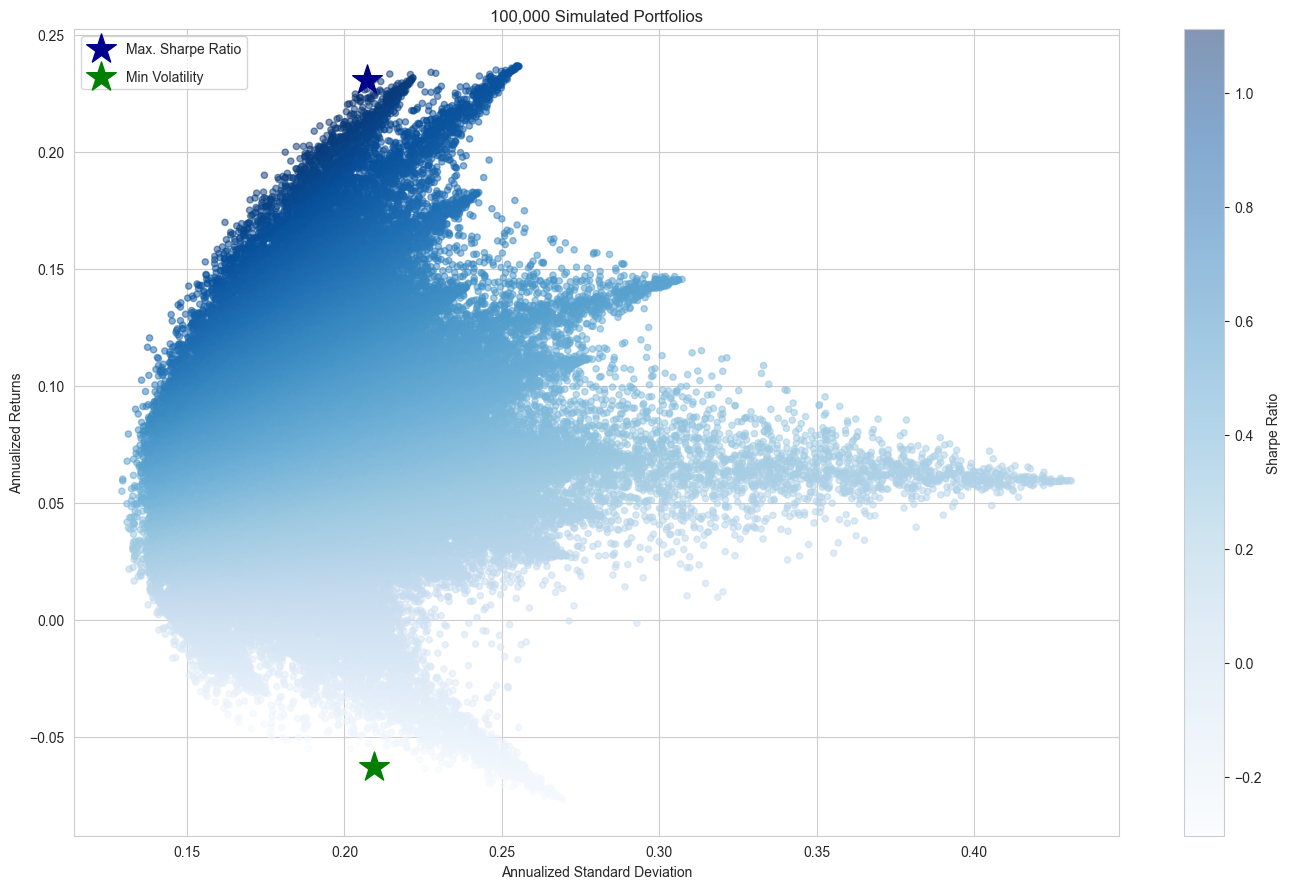

In [81]:
import warnings
warnings.filterwarnings('ignore')
ax = simul_perf.plot.scatter(x=0, y=1, c=2, cmap='Blues',
                             alpha=0.5, figsize=(14, 9), colorbar=True,
                             title=f'{NUM_PF:,d} Simulated Portfolios')

#max_sharpe_idx = simul_perf.iloc[:, 2].idxmax()
max_sharpe_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
sd, r = simul_perf.iloc[max_sharpe_idx, :2].values
print(f'Max Sharpe: {sd:.2%}, {r:.2%}')
ax.scatter(sd, r, marker='*', color='darkblue', s=500, label='Max. Sharpe Ratio')

#min_vol_idx = simul_perf.iloc[:, 0].idxmin()
min_vol_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].min())[0][0]
sd, r = simul_perf.iloc[min_vol_idx, :2].values
ax.scatter(sd, r, marker='*', color='green', s=500, label='Min Volatility')
plt.legend(labelspacing=1, loc='upper left')
plt.tight_layout()

# Compute Annualize PF Performance
Now we'll set up the quadratic optimization problem to solve for the minimum standard deviation for a given return or the maximum SR.

To this end, define the functions that measure the key metrics:


In [56]:
def portfolio_std(wt, rt=None, cov=None):
    """Annualized PF standard deviation"""
    return np.sqrt(wt @ cov @ wt * periods_per_year)

In [57]:
def portfolio_returns(wt, rt=None, cov=None):
    """Annualized PF returns"""
    return (wt @ rt + 1) ** periods_per_year - 1

In [58]:
def portfolio_performance(wt, rt, cov):
    """Annualized PF returns & standard deviation"""
    r = portfolio_returns(wt, rt=rt)
    sd = portfolio_std(wt, cov=cov)
    return r, sd

# Max Sharpe PF
Define a target function that represents the negative SR for scipy's minimize function to optimize, given the constraints that the weights are bounded by [-1, 1], if short trading is permitted, and [0, 1] otherwise, and sum to one in absolute terms.

In [59]:
def neg_sharpe_ratio(weights, mean_ret, cov):
    r, sd = portfolio_performance(weights, mean_ret, cov)
    return -(r - rf_rate) / sd

In [60]:
weight_constraint = {'type': 'eq', 
                     'fun': lambda x: np.sum(np.abs(x))-1}

In [61]:
def max_sharpe_ratio(mean_ret, cov, short=False):
    return minimize(fun=neg_sharpe_ratio,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=((-1 if short else 0, 1),) * n_assets,
                    constraints=weight_constraint,
                    options={'tol':1e-10, 'maxiter':1e4})

# Compute Efficient Frontier
The solution requires iterating over ranges of acceptable values to identify optimal risk-return combinations

In [64]:
def min_vol_target(mean_ret, cov, target, short=False):

    def ret_(wt):
        return portfolio_returns(wt, mean_ret)

    constraints = [{'type': 'eq',
                    'fun': lambda x: ret_(x) - target},
                   weight_constraint]

    bounds = ((-1 if short else 0, 1),) * n_assets
    return minimize(portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=constraints,
                    options={'tol': 1e-10, 'maxiter': 1e4})

# Min Volatility Portfolio

In [65]:
def min_vol(mean_ret, cov, short=False):
    bounds = ((-1 if short else 0, 1),) * n_assets

    return minimize(fun=portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=weight_constraint,
                    options={'tol': 1e-10, 'maxiter': 1e4})

In [66]:
def efficient_frontier(mean_ret, cov, ret_range, short=False):
    return [min_vol_target(mean_ret, cov, ret) for ret in ret_range]


# Run Calculation
## Get random PF

In [67]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)

In [68]:
print(simul_perf.describe())

       Annualized Returns
count       100000.000000
mean             0.076454
std              0.044588
min             -0.076558
25%              0.051590
50%              0.074018
75%              0.099712
max              0.236711


In [79]:
simul_max_sharpe = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
simul_perf.iloc[simul_max_sharpe]

Annualized Standard Deviation    0.207177
Annualized Returns               0.230902
Sharpe Ratio                     1.110895
Name: 56687, dtype: object

In [88]:
# Get Max Sharpe PF

In [83]:
max_sharpe_pf = max_sharpe_ratio(mean_returns, cov_matrix, short=False)
max_sharpe_perf = portfolio_performance(max_sharpe_pf.x, mean_returns, cov_matrix)

In [84]:
r, sd = max_sharpe_perf
pd.Series({'ret': r, 'sd': sd, 'sr': (r-rf_rate)/sd})

ret    0.219844
sd     0.192591
sr     1.137612
dtype: float64

# Get Min Vol PF

In [85]:
min_vol_pf = min_vol(mean_returns, cov_matrix, short=False)
min_vol_perf = portfolio_performance(min_vol_pf.x, mean_returns, cov_matrix)

In [86]:
ret_range = np.linspace(simul_perf.iloc[:, 1].min(), simul_perf.iloc[:, 1].max(), 50)
eff_pf = efficient_frontier(mean_returns, cov_matrix, ret_range, short=True)
eff_pf = pd.Series(dict(zip([p['fun'] for p in eff_pf], ret_range)))

# Plot Result

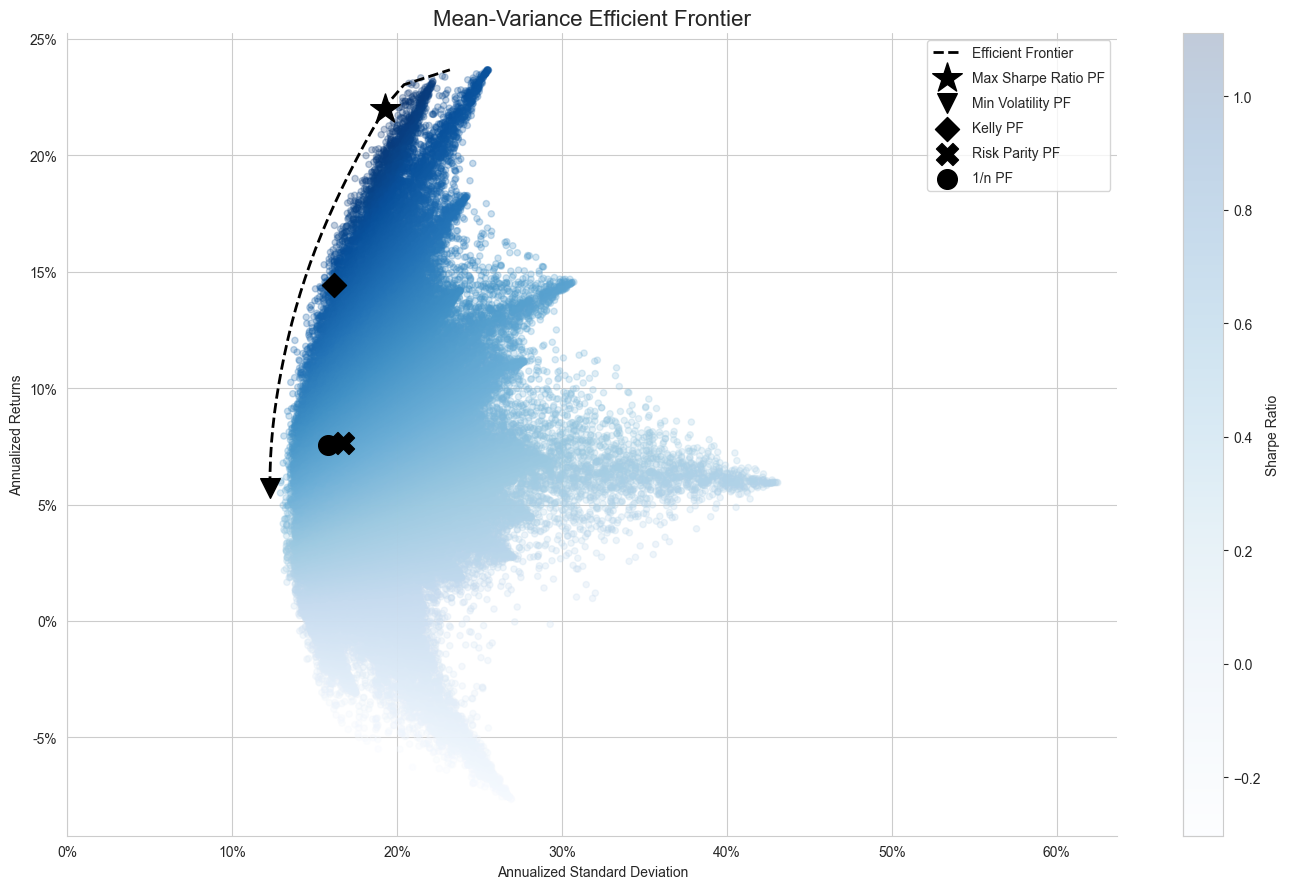

In [87]:
fig, ax = plt.subplots()
simul_perf.plot.scatter(x=0, y=1, c=2, ax=ax, cmap='Blues',alpha=0.25, 
                        figsize=(14, 9), colorbar=True)

eff_pf[eff_pf.index.min():].plot(linestyle='--', lw=2, ax=ax, c='k',
                                 label='Efficient Frontier')

r, sd = max_sharpe_perf
ax.scatter(sd, r, marker='*', color='k', s=500, label='Max Sharpe Ratio PF')

r, sd = min_vol_perf
ax.scatter(sd, r, marker='v', color='k', s=200, label='Min Volatility PF')

kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='D', color='k', s=150, label='Kelly PF')

std = weekly_returns.std()
std /= std.sum()
r, sd = portfolio_performance(std, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='X', color='k', s=250, label='Risk Parity PF')

r, sd = portfolio_performance(np.full(n_assets, 1/n_assets), mean_returns, cov_matrix)
ax.scatter(sd, r, marker='o', color='k', s=200, label='1/n PF')


ax.legend(labelspacing=0.8)
ax.set_xlim(0, eff_pf.max()+.4)
ax.set_title('Mean-Variance Efficient Frontier', fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
fig.tight_layout();